# Modeliranje temperaturne regulacije plastenjaka

V naslednjih dveh nizih vaj bomo oblikovali večplaten model namen katerega bo simulirati temperaturno regulacijo plastenjaka. Z modelom bomo skušali podatki kvantitativni opis energijskih potreb plastenjaka na določeni lokaciji na Zemlji, skozi celotno leto. V ta namen bomo potrebovali:

1. Lega Sonca na nebu
 1. Dolžina dneva
 2. Efektivna površina
![Slika_površina](https://cdn.discordapp.com/attachments/1082218438082166785/1082220760040476732/Slika1.png)

2. Vremensje kastnosti lokacije
 1. Zunanja temperatura
 2. Oblačnost
 3. Obsevanje
![Slika_2](https://cdn.discordapp.com/attachments/1082218438082166785/1082282874948030494/Temperatura_plastenjak.png)



3. Toplotni tokovi skozi plastenjak
 1. Viri toplotnega pritoka
 2. Viri toplotnega odtoka
![Slika_3](https://cdn.discordapp.com/attachments/1082218438082166785/1082283111024435301/Prehajanje_toplote.png)

# Fukncije in knjižice

In [36]:
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u
import time
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from calendar import monthrange

def plot_vzhod(x1,x2,y):
    fig = plt.figure()
    ax = plt.axes(polar=True)

    x1 =  np.array([2*np.pi/360*xx for xx in x1])
    x2 =  np.array([2*np.pi/360*xx for xx in x2])
    y = np.array(y)
    ax.plot(x1, y, "go")
    ax.plot(x2, y, "ro")
    ax.set_ylim(4,20)
    plt.show()
    

def convert_to_string(xx,ref):
    m=str(xx)
    m_len=len(m)
    m_levo=(ref-m_len)//2
    m_desno=ref-m_len-m_levo
    m1=' '.join('' for k in range(m_levo))
    m2=' '.join('' for k in range(m_desno))
    return m1+m+m2
    
def convert_time_to_float(t):
    h=float(t.split(":")[0])
    m=float(t.split(":")[1])/60.0
    return h+m

def convert(t):
    return time.mktime(time.strptime(t, '%Y-%m-%d %H:%M:%S'))

def convert_deg(d):
    deg=d.split("d")[0]
    m=d.split("d")[1].split("m")[0]
    s=d.split("m")[1].split("s")[0]
    deg=float(deg)+float(m)/60+float(s)/3600
    return deg

def d2r(x):
    return x*np.pi/180.0

# Sonce na nebu

Tukaj se posvetimo določitvi lokacije Sonca na nebu skozi dan v teku leta. Uporabljena bo minutna resolucija zaradi bolj natančne določitve vzhoda in zahoda.

## Dolžina dneva

In [3]:
#knjižica omogoča dostop do lon in lat lokacij na različne načine
#print(coord.EarthLocation.get_site_names()[3:5],"...")

loc=coord.EarthLocation.of_address("Koroška cesta 160, Maribor, Slovenija")
lat=loc.lat.degree
lon=loc.lon.degree
print(f"Latitute: {lat:.2f}°")
print(f"Longitude: {lon:.2f}°")

Latitute: 46.56°
Longitude: 15.62°


In [4]:
loc = coord.EarthLocation(lon=lon* u.deg,lat=lat * u.deg)
now = Time.now()
print(now,type(now))

2023-03-06 11:18:10.400660 <class 'astropy.time.core.Time'>


## Lega Sonca skozi leto

In [13]:
'''
Podatkovna baza, ki bo hranila urne lokacije sonca skozi leto na dani lokaciji
'''
df_hourly={}
df_hourly["datum"]=[]
df_hourly["mesec"]=[]
df_hourly["dan"]=[]
df_hourly["ura"]=[]
df_hourly["minuta"]=[]
df_hourly["alt"]=[]
df_hourly["az"]=[]

'''
Podatakovna baza, ki bo za vsak dan vsebovala ključne informacije v povezavi z lego Sonca
'''
df={}
df["datum"]=[]
df["mesec"]=[]
df["max alt"]=[]
df["vzhod az"]=[]
df["vzhod"]=[]
df["zahod az"]=[]
df["zahod"]=[]
df["dt"]=[]

| dan |  mesec | alt(°) | vzhod ura | zahod ura |  dolžina dneva | vzhod lokacija | zahod lokacija |        |
|-----|--------|--------|-----------|-----------|----------------|----------------|----------------|--------|


Mesec:   0%|          | 0/12 [00:00<?, ?it/s]

Dan:   0%|          | 0/31 [00:00<?, ?it/s]

|  1  |   1    | 20.43  | 06:41:00  | 15:22:00  |      8.68      |     123.49     |     236.74     |   24  
|  2  |   1    | 20.52  | 06:41:00  | 15:23:00  |      8.70      |     123.35     |     236.89     |   48  
|  3  |   1    | 20.61  | 06:41:00  | 15:24:00  |      8.72      |     123.21     |     237.05     |   72  
|  4  |   1    | 20.71  | 06:41:00  | 15:25:00  |      8.73      |     123.07     |     237.21     |   96  
|  5  |   1    | 20.82  | 06:41:00  | 15:26:00  |      8.75      |     122.92     |     237.38     |  120  
|  6  |   1    | 20.94  | 06:41:00  | 15:27:00  |      8.77      |     122.77     |     237.55     |  144  
|  7  |   1    | 21.06  | 06:40:00  | 15:28:00  |      8.80      |     122.43     |     237.73     |  168  
|  8  |   1    | 21.19  | 06:40:00  | 15:29:00  |      8.82      |     122.28     |     237.92     |  192  
|  9  |   1    | 21.33  | 06:40:00  | 15:30:00  |      8.83      |     122.11     |     238.11     |  216  
| 10  |   1    | 21.47  | 06

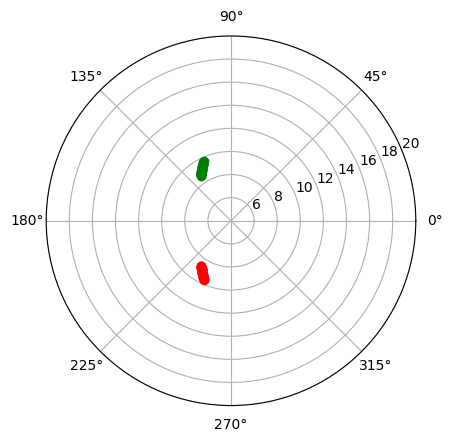

Dan:   0%|          | 0/28 [00:00<?, ?it/s]

|  1  |   2    | 26.33  | 06:21:00  | 16:02:00  |      9.68      |     114.31     |     245.95     |  768  
|  2  |   2    | 26.62  | 06:20:00  | 16:04:00  |      9.73      |     113.92     |     246.47     |  792  
|  3  |   2    | 26.91  | 06:19:00  | 16:05:00  |      9.77      |     113.52     |     246.83     |  816  
|  4  |   2    | 27.20  | 06:17:00  | 16:07:00  |      9.83      |     112.95     |     247.37     |  840  
|  5  |   2    | 27.51  | 06:16:00  | 16:08:00  |      9.87      |     112.56     |     247.73     |  864  
|  6  |   2    | 27.81  | 06:15:00  | 16:10:00  |      9.92      |     112.16     |     248.28     |  888  
|  7  |   2    | 28.12  | 06:13:00  | 16:11:00  |      9.97      |     111.58     |     248.66     |  912  
|  8  |   2    | 28.44  | 06:12:00  | 16:13:00  |     10.02      |     111.19     |     249.22     |  936  
|  9  |   2    | 28.75  | 06:10:00  | 16:14:00  |     10.07      |     110.61     |     249.61     |  960  
| 10  |   2    | 29.08  | 06

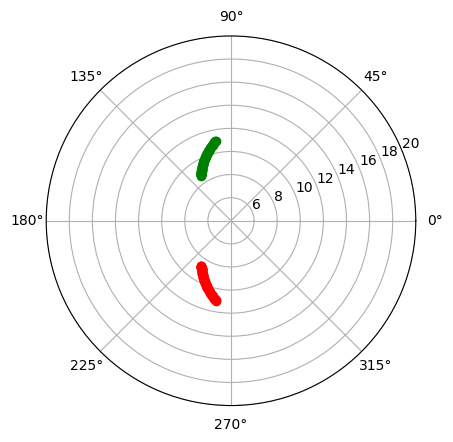

Dan:   0%|          | 0/31 [00:00<?, ?it/s]

|  1  |   3    | 35.84  | 05:37:00  | 16:44:00  |     11.12      |     100.18     |     260.17     |  1440 
|  2  |   3    | 36.22  | 05:35:00  | 16:46:00  |     11.18      |     99.60      |     260.83     |  1464 
|  3  |   3    | 36.60  | 05:34:00  | 16:47:00  |     11.22      |     99.19      |     261.31     |  1488 
|  4  |   3    | 36.99  | 05:32:00  | 16:49:00  |     11.28      |     98.61      |     261.97     |  1512 
|  5  |   3    | 37.37  | 05:30:00  | 16:50:00  |     11.33      |     98.02      |     262.46     |  1536 
|  6  |   3    | 37.76  | 05:28:00  | 16:51:00  |     11.38      |     97.43      |     262.95     |  1560 
|  7  |   3    | 38.15  | 05:26:00  | 16:53:00  |     11.45      |     96.85      |     263.62     |  1584 
|  8  |   3    | 38.54  | 05:24:00  | 16:54:00  |     11.50      |     96.26      |     264.11     |  1608 
|  9  |   3    | 38.93  | 05:22:00  | 16:56:00  |     11.57      |     95.68      |     264.79     |  1632 
| 10  |   3    | 39.32  | 05

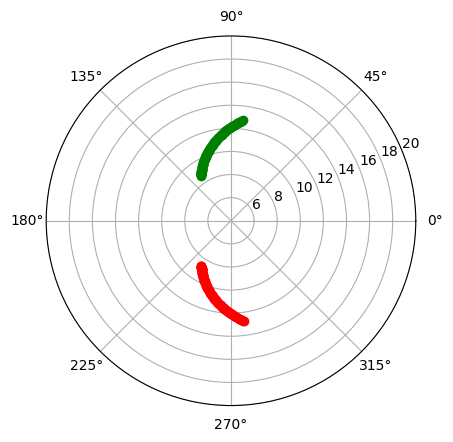

Dan:   0%|          | 0/30 [00:00<?, ?it/s]

|  1  |   4    | 47.97  | 04:37:00  | 17:27:00  |     12.83      |     82.50      |     277.84     |  2184 
|  2  |   4    | 48.35  | 04:35:00  | 17:29:00  |     12.90      |     81.93      |     278.52     |  2208 
|  3  |   4    | 48.74  | 04:34:00  | 17:30:00  |     12.93      |     81.54      |     279.02     |  2232 
|  4  |   4    | 49.12  | 04:32:00  | 17:31:00  |     12.98      |     80.97      |     279.51     |  2256 
|  5  |   4    | 49.50  | 04:30:00  | 17:33:00  |     13.05      |     80.40      |     280.19     |  2280 
|  6  |   4    | 49.88  | 04:28:00  | 17:34:00  |     13.10      |     79.83      |     280.68     |  2304 
|  7  |   4    | 50.25  | 04:26:00  | 17:36:00  |     13.17      |     79.26      |     281.35     |  2328 
|  8  |   4    | 50.63  | 04:24:00  | 17:37:00  |     13.22      |     78.69      |     281.84     |  2352 
|  9  |   4    | 51.00  | 04:22:00  | 17:38:00  |     13.27      |     78.12      |     282.32     |  2376 
| 10  |   4    | 51.37  | 04

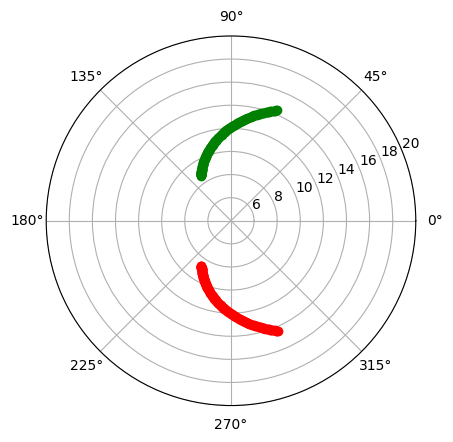

Dan:   0%|          | 0/31 [00:00<?, ?it/s]

|  1  |   5    | 58.51  | 03:43:00  | 18:08:00  |     14.42      |     66.82      |     293.61     |  2904 
|  2  |   5    | 58.81  | 03:42:00  | 18:09:00  |     14.45      |     66.46      |     294.01     |  2928 
|  3  |   5    | 59.10  | 03:40:00  | 18:11:00  |     14.52      |     65.92      |     294.59     |  2952 
|  4  |   5    | 59.40  | 03:39:00  | 18:12:00  |     14.55      |     65.57      |     294.98     |  2976 
|  5  |   5    | 59.68  | 03:37:00  | 18:13:00  |     14.60      |     65.03      |     295.36     |  3000 
|  6  |   5    | 59.97  | 03:36:00  | 18:15:00  |     14.65      |     64.68      |     295.92     |  3024 
|  7  |   5    | 60.24  | 03:34:00  | 18:16:00  |     14.70      |     64.15      |     296.30     |  3048 
|  8  |   5    | 60.52  | 03:33:00  | 18:17:00  |     14.73      |     63.80      |     296.67     |  3072 
|  9  |   5    | 60.79  | 03:31:00  | 18:18:00  |     14.78      |     63.27      |     297.03     |  3096 
| 10  |   5    | 61.05  | 03

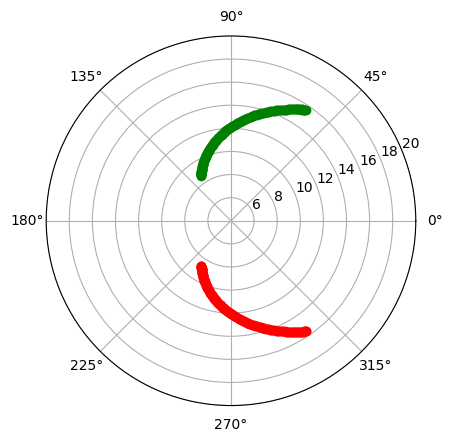

Dan:   0%|          | 0/30 [00:00<?, ?it/s]

|  1  |   6    | 65.49  | 03:08:00  | 18:44:00  |     15.60      |     55.84      |     304.46     |  3648 
|  2  |   6    | 65.62  | 03:07:00  | 18:45:00  |     15.63      |     55.55      |     304.69     |  3672 
|  3  |   6    | 65.75  | 03:07:00  | 18:46:00  |     15.65      |     55.44      |     304.92     |  3696 
|  4  |   6    | 65.87  | 03:06:00  | 18:47:00  |     15.68      |     55.16      |     305.15     |  3720 
|  5  |   6    | 65.98  | 03:06:00  | 18:48:00  |     15.70      |     55.05      |     305.36     |  3744 
|  6  |   6    | 66.08  | 03:05:00  | 18:49:00  |     15.73      |     54.77      |     305.58     |  3768 
|  7  |   6    | 66.18  | 03:05:00  | 18:49:00  |     15.73      |     54.68      |     305.60     |  3792 
|  8  |   6    | 66.28  | 03:04:00  | 18:50:00  |     15.77      |     54.40      |     305.81     |  3816 
|  9  |   6    | 66.36  | 03:04:00  | 18:51:00  |     15.78      |     54.31      |     306.01     |  3840 
| 10  |   6    | 66.44  | 03

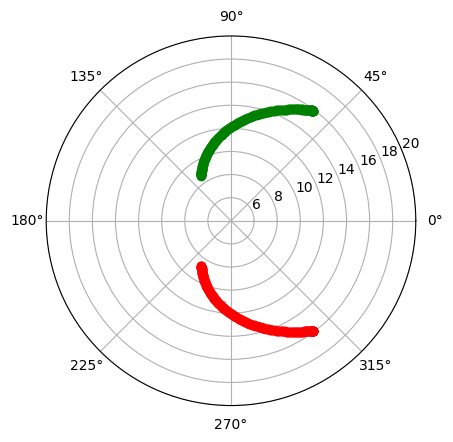

Dan:   0%|          | 0/31 [00:00<?, ?it/s]

|  1  |   7    | 66.54  | 03:07:00  | 18:56:00  |     15.82      |     53.88      |     306.15     |  4368 
|  2  |   7    | 66.47  | 03:08:00  | 18:56:00  |     15.80      |     54.07      |     306.07     |  4392 
|  3  |   7    | 66.39  | 03:09:00  | 18:56:00  |     15.78      |     54.26      |     305.99     |  4416 
|  4  |   7    | 66.31  | 03:09:00  | 18:55:00  |     15.77      |     54.28      |     305.72     |  4440 
|  5  |   7    | 66.22  | 03:10:00  | 18:55:00  |     15.75      |     54.48      |     305.63     |  4464 
|  6  |   7    | 66.12  | 03:11:00  | 18:54:00  |     15.72      |     54.69      |     305.36     |  4488 
|  7  |   7    | 66.02  | 03:11:00  | 18:54:00  |     15.72      |     54.72      |     305.27     |  4512 
|  8  |   7    | 65.91  | 03:12:00  | 18:54:00  |     15.70      |     54.94      |     305.17     |  4536 
|  9  |   7    | 65.79  | 03:13:00  | 18:53:00  |     15.67      |     55.17      |     304.89     |  4560 
| 10  |   7    | 65.67  | 03

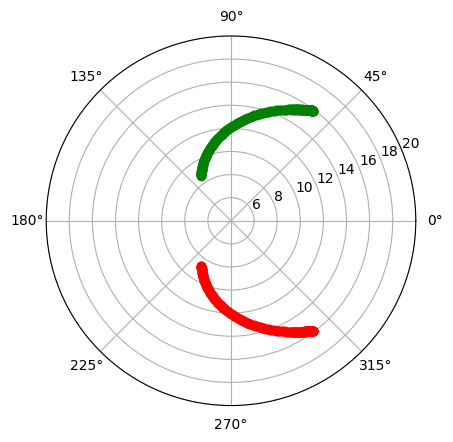

Dan:   0%|          | 0/31 [00:00<?, ?it/s]

|  1  |   8    | 61.45  | 03:37:00  | 18:31:00  |     14.90      |     62.02      |     297.92     |  5112 
|  2  |   8    | 61.20  | 03:38:00  | 18:29:00  |     14.85      |     62.38      |     297.40     |  5136 
|  3  |   8    | 60.94  | 03:40:00  | 18:28:00  |     14.80      |     62.92      |     297.07     |  5160 
|  4  |   8    | 60.67  | 03:41:00  | 18:27:00  |     14.77      |     63.29      |     296.73     |  5184 
|  5  |   8    | 60.41  | 03:42:00  | 18:25:00  |     14.72      |     63.66      |     296.21     |  5208 
|  6  |   8    | 60.13  | 03:43:00  | 18:24:00  |     14.68      |     64.04      |     295.87     |  5232 
|  7  |   8    | 59.86  | 03:45:00  | 18:22:00  |     14.62      |     64.61      |     295.35     |  5256 
|  8  |   8    | 59.57  | 03:46:00  | 18:21:00  |     14.58      |     64.99      |     295.00     |  5280 
|  9  |   8    | 59.29  | 03:47:00  | 18:19:00  |     14.53      |     65.38      |     294.48     |  5304 
| 10  |   8    | 59.00  | 03

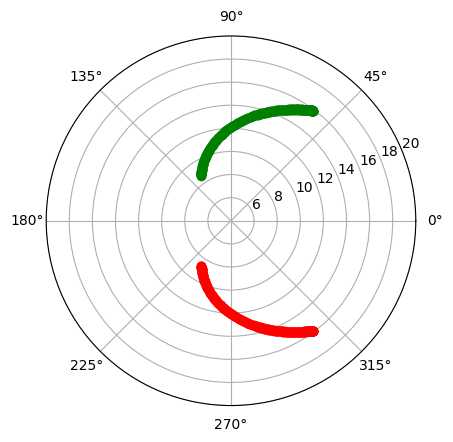

Dan:   0%|          | 0/30 [00:00<?, ?it/s]

|  1  |   9    | 51.72  | 04:16:00  | 17:39:00  |     13.38      |     76.69      |     283.14     |  5856 
|  2  |   9    | 51.35  | 04:18:00  | 17:37:00  |     13.32      |     77.36      |     282.59     |  5880 
|  3  |   9    | 50.99  | 04:19:00  | 17:35:00  |     13.27      |     77.84      |     282.03     |  5904 
|  4  |   9    | 50.62  | 04:20:00  | 17:33:00  |     13.22      |     78.34      |     281.48     |  5928 
|  5  |   9    | 50.25  | 04:22:00  | 17:31:00  |     13.15      |     79.01      |     280.92     |  5952 
|  6  |   9    | 49.88  | 04:23:00  | 17:29:00  |     13.10      |     79.51      |     280.37     |  5976 
|  7  |   9    | 49.51  | 04:24:00  | 17:27:00  |     13.05      |     80.01      |     279.81     |  6000 
|  8  |   9    | 49.13  | 04:25:00  | 17:25:00  |     13.00      |     80.50      |     279.26     |  6024 
|  9  |   9    | 48.76  | 04:27:00  | 17:23:00  |     12.93      |     81.19      |     278.70     |  6048 
| 10  |   9    | 48.38  | 04

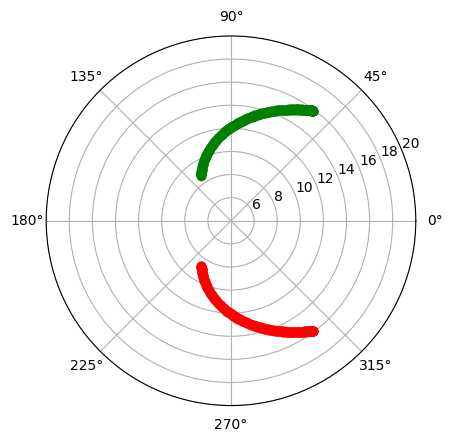

Dan:   0%|          | 0/31 [00:00<?, ?it/s]

|  1  |   10   | 40.26  | 04:55:00  | 16:40:00  |     11.75      |     93.51      |     266.45     |  6576 
|  2  |   10   | 39.87  | 04:56:00  | 16:38:00  |     11.70      |     94.02      |     265.88     |  6600 
|  3  |   10   | 39.49  | 04:58:00  | 16:36:00  |     11.63      |     94.70      |     265.31     |  6624 
|  4  |   10   | 39.10  | 04:59:00  | 16:34:00  |     11.58      |     95.21      |     264.74     |  6648 
|  5  |   10   | 38.71  | 05:00:00  | 16:32:00  |     11.53      |     95.71      |     264.17     |  6672 
|  6  |   10   | 38.33  | 05:02:00  | 16:30:00  |     11.47      |     96.39      |     263.60     |  6696 
|  7  |   10   | 37.95  | 05:03:00  | 16:28:00  |     11.42      |     96.89      |     263.02     |  6720 
|  8  |   10   | 37.57  | 05:04:00  | 16:26:00  |     11.37      |     97.38      |     262.45     |  6744 
|  9  |   10   | 37.18  | 05:06:00  | 16:24:00  |     11.30      |     98.06      |     261.88     |  6768 
| 10  |   10   | 36.81  | 05

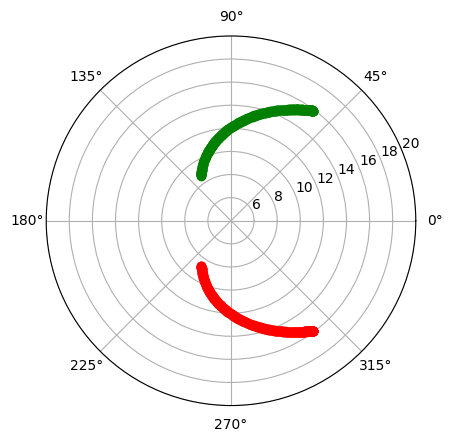

Dan:   0%|          | 0/30 [00:00<?, ?it/s]

|  1  |   11   | 29.02  | 05:38:00  | 15:44:00  |     10.10      |     110.08     |     249.80     |  7320 
|  2  |   11   | 28.70  | 05:40:00  | 15:43:00  |     10.05      |     110.66     |     249.41     |  7344 
|  3  |   11   | 28.39  | 05:41:00  | 15:42:00  |     10.02      |     111.05     |     249.03     |  7368 
|  4  |   11   | 28.08  | 05:42:00  | 15:40:00  |      9.97      |     111.44     |     248.46     |  7392 
|  5  |   11   | 27.77  | 05:44:00  | 15:39:00  |      9.92      |     112.00     |     248.07     |  7416 
|  6  |   11   | 27.47  | 05:45:00  | 15:37:00  |      9.87      |     112.38     |     247.51     |  7440 
|  7  |   11   | 27.17  | 05:47:00  | 15:36:00  |      9.82      |     112.93     |     247.12     |  7464 
|  8  |   11   | 26.88  | 05:48:00  | 15:35:00  |      9.78      |     113.29     |     246.74     |  7488 
|  9  |   11   | 26.59  | 05:50:00  | 15:33:00  |      9.72      |     113.83     |     246.17     |  7512 
| 10  |   11   | 26.31  | 05

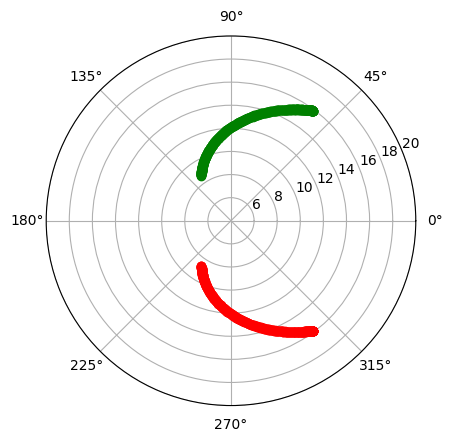

Dan:   0%|          | 0/31 [00:00<?, ?it/s]

|  1  |   12   | 21.64  | 06:20:00  | 15:14:00  |      8.90      |     121.54     |     238.65     |  8040 
|  2  |   12   | 21.49  | 06:21:00  | 15:13:00  |      8.87      |     121.75     |     238.30     |  8064 
|  3  |   12   | 21.34  | 06:22:00  | 15:13:00  |      8.85      |     121.95     |     238.14     |  8088 
|  4  |   12   | 21.20  | 06:23:00  | 15:13:00  |      8.83      |     122.15     |     237.99     |  8112 
|  5  |   12   | 21.07  | 06:24:00  | 15:12:00  |      8.80      |     122.34     |     237.65     |  8136 
|  6  |   12   | 20.95  | 06:25:00  | 15:12:00  |      8.78      |     122.52     |     237.50     |  8160 
|  7  |   12   | 20.83  | 06:26:00  | 15:12:00  |      8.77      |     122.70     |     237.35     |  8184 
|  8  |   12   | 20.72  | 06:28:00  | 15:12:00  |      8.73      |     123.05     |     237.20     |  8208 
|  9  |   12   | 20.62  | 06:29:00  | 15:12:00  |      8.72      |     123.21     |     237.06     |  8232 
| 10  |   12   | 20.53  | 06

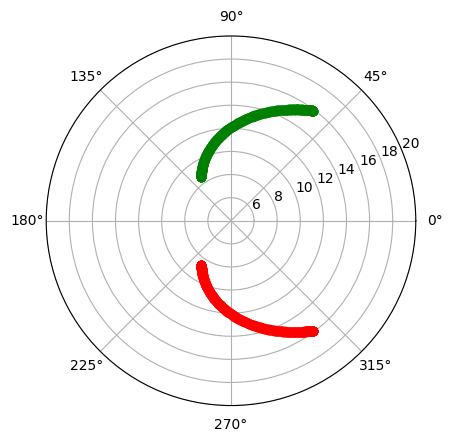

In [14]:
print("| dan |  mesec | alt(°) | vzhod ura | zahod ura |  dolžina dneva | vzhod lokacija | zahod lokacija |        |")
print("|-----|--------|--------|-----------|-----------|----------------|----------------|----------------|--------|")

ref_len_0=len("-----")
ref_len_1=len("--------")
ref_len_2=len("-----------")
ref_len_3=len("----------------")

leto=2023

for mesec in tqdm(range(1,13,1),desc="Mesec"):
    st_dni=int(monthrange(leto, mesec)[1])
    for dan in tqdm(range(1,st_dni+1),desc="Dan"):
        alt=[]
        sun_rise=None
        sun_set=None
        sun_rise_az=None
        sun_set_az=None
        for h in range(0,24):
            for m in range(0,60,1):
                t="%04d-%02d-%02dT%02d:%02d:00"%(leto,mesec,dan,h,m)
                altaz = coord.AltAz(location=loc, obstime=t)
                sun = coord.get_sun(Time(t, format='isot', scale='utc'))
                y=sun.transform_to(altaz).alt
                y2=sun.transform_to(altaz).az
                alt.append(convert_deg(str(y)))
                if m==0:
                    df_hourly["datum"].append(t)
                    df_hourly["mesec"].append(mesec)
                    df_hourly["dan"].append(dan)
                    df_hourly["ura"].append(h)
                    df_hourly["minuta"].append(m)
                    df_hourly["alt"].append(alt[-1])
                    df_hourly["az"].append(convert_deg(str(y2)))
                if len(alt)>1:
                    if alt[len(alt)-1]*alt[len(alt)-2]<0 and sun_rise==None:
                        #print(day,month,f"{h}:{m} alt={alt[-1]:.1f}° in az {convert_deg(str(y2)):.1f}°")
                        sun_rise=t.split("T")[1]
                        sun_rise_az=convert_deg(str(y2))

                    if alt[len(alt)-1]*alt[len(alt)-2]<0 and sun_rise!=None:
                        sun_set=t.split("T")[1]
                        sun_set_az=convert_deg(str(y2))
        
        H=float(sun_set.split(":")[0])-float(sun_rise.split(":")[0])
        M=float(sun_set.split(":")[1])-float(sun_rise.split(":")[1])
        dt=H+M/60

        print("|",convert_to_string(dan,ref_len_0),"|",
              convert_to_string(mesec,ref_len_1),"|",
              convert_to_string("%.2f"%max(alt),ref_len_1),"|",
              convert_to_string(sun_rise,ref_len_2),"|",
              convert_to_string(sun_set,ref_len_2),"|",
              convert_to_string("%.2f"%dt,ref_len_3),"|",
              convert_to_string("%.2f"%sun_rise_az,ref_len_3),"|",
              convert_to_string("%.2f"%sun_set_az,ref_len_3),"|",
              convert_to_string(f'{len(df_hourly["datum"])}',ref_len_1))
        #print(day,"%.2f"%max(alt),sun_rise,sun_set,"%.2f"%dt,"%.2f"%sun_rise_az,"%.2f"%sun_set_az)
        df["datum"].append(t)
        df["mesec"].append(mesec)
        df["max alt"].append(max(alt))

        tt=convert_time_to_float(sun_rise)
        df["vzhod"].append(tt)

        tt=convert_time_to_float(sun_set)
        df["zahod"].append(tt)
        df["vzhod az"].append(sun_rise_az)
        df["zahod az"].append(sun_set_az)
        df["dt"].append(dt)
    plot_vzhod(df["vzhod az"],df["zahod az"],df["dt"])

In [16]:
for i in df:
    print(i,len(df[i]))
for i in df_hourly:
    print(i,len(df_hourly[i]))   

datum 365
mesec 365
max alt 365
vzhod az 365
vzhod 365
zahod az 365
zahod 365
dt 365
datum 8760
mesec 8760
dan 8760
ura 8760
minuta 8760
alt 8760
az 8760


In [17]:
import pandas as pd
df=pd.DataFrame.from_dict(df)
df.to_csv("solar_daily.csv")

df_hourly=pd.DataFrame.from_dict(df_hourly)
df_hourly.to_csv("solar_hourly.csv")

In [79]:
import pandas as pd
df=pd.read_csv("solar_daily.csv")
df_hourly=pd.read_csv("solar_hourly.csv")
df_hourly["datum_v2"]=df_hourly["datum"].apply(lambda x:x.split("T")[0])
display(df_hourly.head(5))

,Unnamed: 0,datum,mesec,dan,ura,minuta,alt,az,datum_v2
0,0,2023-01-01T00:00:00,1,1,0,0,-62.384042,31.997377,2023-01-01
1,1,2023-01-01T01:00:00,1,1,1,0,-55.581753,55.827032,2023-01-01
2,2,2023-01-01T02:00:00,1,1,2,0,-46.863795,72.459365,2023-01-01
3,3,2023-01-01T03:00:00,1,1,3,0,-36.966949,85.181309,2023-01-01
4,4,2023-01-01T04:00:00,1,1,4,0,-25.262620,96.028516,2023-01-01


# Vreme

## Temperatura

Uporabili bomo vremenske podatke avtomatske merilne postaje locirane v kraju Ravne na Koroškem za obdobje od 1. 1. 2021 do 31. 12. 2021. Podatki imajo časovno resolucijo 0.5 h. Kot prvo predstavimo povprečno temperaturo, izmerjeno na višini 2 m od tal, za prej omenjeno časovno obdobje.


In [80]:
df_Vreme=pd.read_csv("Vreme_urni.csv")
df_Vreme.columns=["datum","time","T","J"]
display(df_Vreme)

,datum,time,T,J
0,2021-01-01,00:00,1.30,0.0
1,2021-01-01,01:00,1.25,0.0
2,2021-01-01,02:00,1.15,0.0
3,2021-01-01,03:00,0.95,0.0
4,2021-01-01,04:00,0.80,0.0
...,...,...,...,...
8755,2021-12-31,19:00,-0.45,0.0
8756,2021-12-31,20:00,-0.55,0.0
8757,2021-12-31,21:00,-0.80,0.0
8758,2021-12-31,22:00,-1.05,0.0


# Efektivna površina

Omeniti je potrebno, da se površina izračunana v enačbi (10) v primeru svetlobnega toka j_A in j_C ne spreminja. Je pa potrebno to površino korigirati v primeru toka j_B, saj je obsijana površina plastenjaka odvisna od lege Sonca na nebu. V splošnem so lahko le tri površine istočasno obsijane s Sončevo svetlobo, tako bomo za vsako od površin posebej obravnavali in upoštevali enačbo:


![Slika_xx](https://www.scratchapixel.com/images/shading-intro/shad-light-beam2.png?)
![Slika_xxx](https://www.nachi.org/images2012/sun-path.jpg)

$$ f=\frac{sin(\alpha)cos(\beta)+cos(\alpha)\ast c o s(\gamma_S-\gamma)\ast s i n(\beta)}{sin(\alpha)}$$

$\alpha$ - višina Sonca <br>
$\beta$ - je nagnjenost površine (navpično je 90°) <br>
$\gamma_S$ - je usmerjenost površine (jug = 0°, zahod = +90°) <br>

. S tem korekcijskim faktorjem lahko tako za vsako stran plastenjaka določimo efektivno površino, skozi katero vpada sončna svetloba, na določene dan v letu ob določeni uri. Spreminjanje tega korekcijskega faktorja za dva izbrana datuma v teku dneva je prikazan v sliki (15).

In [81]:
def f_vzhod(alfa,beta):
    s1=np.sin(d2r(alfa))*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f_jug(alfa,beta):
    s1=np.cos(d2r(alfa-180))*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f_zahod(alfa,beta):
    s1=np.sin(d2r(alfa)+180)*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f_streha(alfa,beta):
    s1=np.cos(d2r(beta-90))
    if s1<0:
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f(alfa,beta):
    return [f_vzhod(alfa,beta),f_jug(alfa,beta),f_zahod(alfa,beta),f_streha(alfa,beta)]

Poglejmo kako se prispevki posameznih površin sprmeinjajo za dva različna datuma. Izbrali bomo datum v zimskem času in datum v poletnem času:
- 8.2.2022
- 25.6.2022

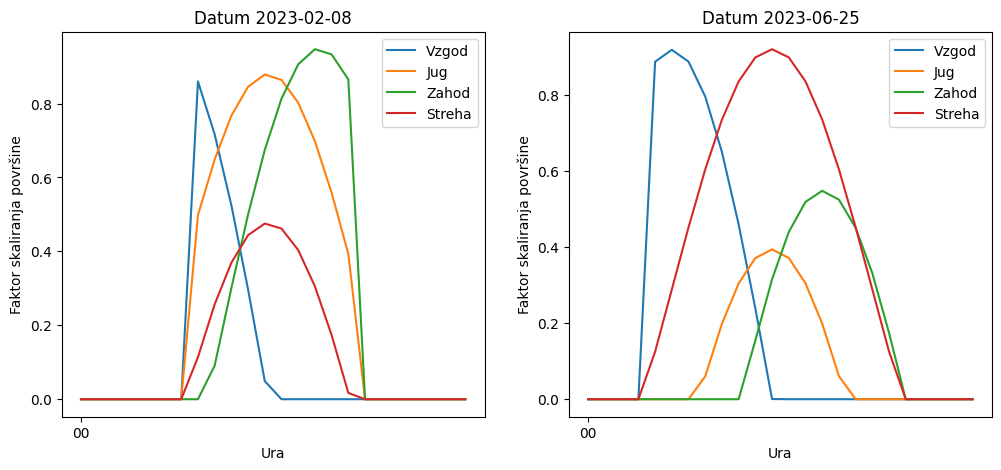

In [82]:
def pripevek_površine_na_datum(datum):
    beta=90
    gama_s=180
    r1=[]
    r2=[]
    r3=[]
    r4=[]
    r5=[]
    day=24*60
    for i,ii in df_hourly[df_hourly["datum_v2"]==datum].iterrows():
        r=f(ii["az"],ii["alt"])
        r1.append(r[0])
        r2.append(r[1])
        r3.append(r[2])
        r4.append(r[3])
    return [r1,r2,r3,r4]

def plot_datum(datum):
    r1,r2,r3,r4=pripevek_površine_na_datum(datum)
    plt.title(f"Datum {datum}")
    plt.plot(r1,label="Vzgod")
    plt.plot(r2,label="Jug")
    plt.plot(r3,label="Zahod")
    plt.plot(r4,label="Streha")
    #plt.ylim(0,1)
    plt.xticks([i for i in range(0,len(r1),60)],["%02d"%int(i/60) for i in range(0,len(r1),60)])
    plt.legend()
    plt.ylabel("Faktor skaliranja površine")
    #plt.xlim(3*60,20*60)
    plt.xlabel("Ura")

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_datum("2023-02-08")
plt.subplot(122)
plot_datum("2023-06-25")
plt.show()

# Sevalni tok Sonca na površini zemlje

V obravnavanem primeru je potrebno upoštevati tudi, da se razdalja, ki jo svetlobni tok prepotuje od zunanjega roba Zemljinega ozračja do površine, spreminja glede na smer vpadanja sončnih žarkov na površino. Tukaj bomo uporabili eksperimentalno določeno funkcijo, ki opisuje, kako se spreminja relativna dolžina, ki jo žarki prepotujejo skozi plast atmosfere v odvisnosti od višine Sonca nad obzorjem:

$$ZM = \frac{1}{\cos(\Theta)+0.50572+(96.07995-\Theta)^{-1.6364}},$$

kjer je ${ZM}$ zračna masa ter \theta vpadni kot, merjen od pravokotnice na površino.

![Slika_sevanje](https://media.discordapp.net/attachments/1082218438082166785/1082218582840184832/Astronomija_ZM.png?width=1440&height=512)

V nadaljevanju definiramo količino svetlobnega toka, ki vpade na površino ob upoštevanju zračne mase, ki jo pri tem prepotuje:

$$ I_P (\theta, \alpha, \mu) = I_0 * {0.7}^{ZM^{0.678}} \cos(\alpha) $$

![Slika_površina](https://cdn.discordapp.com/attachments/1082218438082166785/1082220760040476732/Slika1.png)

V nadaljevanju bomo rezultate oblikovali na način, da bodo odražali **relativno gostoto svetlobnega toka na površino** (Rd). Ta mera bo podajala, kolikšen del od absolutne vrednosti solarne konstante I_0 dejansko prispe do površja Zemlje z upoštevanjem kota osvetlitve:

$$ R_P = \frac {I_p (\theta, \alpha, \mu)}{I_0} $$

In [83]:
def ZM(kot):
    '''
    kot - kot med navpičnico na površino in vpadno smerjo Sončnih žarkov.
    '''
    return 1.0/(np.cos(kot*np.pi/180.0)+0.50572*np.power(96.07995-kot,-1.6364))

def Rp(alfa):
    '''
    Rp je relativni sevalni tok sonca.
    Rp je potrebno pomnožiti z I0, da dobimo
    absolutni sevalni tok.
    '''
    return np.power(0.7,np.power(ZM(alfa),0.678))*np.cos(alfa)

In [84]:
for i,ii in df_hourly.loc[60*7::].head(10).iterrows():
    print(ii["ura"],ii["minuta"],ii["az"],ii["alt"],f_jug(ii["az"],ii["alt"]))

df_hourly["I0"]=None
df_hourly["Rd"]=None
df_hourly["Id"]=None
df_hourly["Sr"]=None


for i,ii in df_hourly.iterrows():
        df_hourly.loc[i,"I0"]=1.35+(1.60-1.25)*0.5*(np.cos(2*np.pi/(365*24)*(i-(10*60))+1))
        yy=0
        if df_hourly.loc[i,"alt"]>0.0:
            yy=Rp(90-df_hourly.loc[i,"alt"])
        df_hourly.loc[i,"Rd"]=np.mean(yy)
        r=f(df_hourly.loc[i,"az"],df_hourly.loc[i,"alt"])
        df_hourly.loc[i,"Id"]=df_hourly.loc[i,"I0"]*df_hourly.loc[i,"Rd"]*sum(r)
        df_hourly.loc[i,"Sr"]=sum(r)
'''tqdm.pandas(desc="Rp")
df_hourly["Rp"]=df_hourly[["alt"]].progress_apply(lambda x:Rp(x),axis=1)

tqdm.pandas(desc="jug")
df_hourly["f_jug"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_jug(x["az"],x["alt"]),axis=1)
tqdm.pandas(desc="vzhod")
df_hourly["f_vzhod"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_vzhod(x["az"],x["alt"]),axis=1)

tqdm.pandas(desc="zahod")
df_hourly["f_zahod"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_zahod(x["az"],x["alt"]),axis=1)

tqdm.pandas(desc="streha")
df_hourly["f_streha"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_streha(x["az"],x["alt"]),axis=1)'''

12 0 193.17099540099443 21.864954961072225 0.9036509096741815
13 0 207.62842639246668 18.27428512319444 0.8412906899740861
14 0 220.89760807121945 12.473870618561111 0.7380379420224913
15 0 232.9027702289556 4.9539204893388895 0.6009162666706835
16 0 243.8812947056861 -2.1860054327166667 0
17 0 254.24731484796388 -12.573187619547223 0
18 0 264.5378164065528 -22.458745211052776 0
19 0 275.4642333817861 -32.169417837716665 0
20 0 288.0893956484028 -42.09478603748889 0
21 0 304.1620722585361 -52.84395598266389 0


'tqdm.pandas(desc="Rp")\ndf_hourly["Rp"]=df_hourly[["alt"]].progress_apply(lambda x:Rp(x),axis=1)\n\ntqdm.pandas(desc="jug")\ndf_hourly["f_jug"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_jug(x["az"],x["alt"]),axis=1)\ntqdm.pandas(desc="vzhod")\ndf_hourly["f_vzhod"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_vzhod(x["az"],x["alt"]),axis=1)\n\ntqdm.pandas(desc="zahod")\ndf_hourly["f_zahod"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_zahod(x["az"],x["alt"]),axis=1)\n\ntqdm.pandas(desc="streha")\ndf_hourly["f_streha"]=df_hourly[["az","alt"]].progress_apply(lambda x:f_streha(x["az"],x["alt"]),axis=1)'

# Pretvarjanje podatkov o legi sonca v iz 1 minutnega v 1h sampling rate

# Združitev dveh dataframe tabel

In [90]:
display(df_hourly.head(5))
try:
    df_hourly=df_hourly.drop(columns=["T"])
    display(df_hourly)
except:
    pass

df_all=pd.merge(df_hourly, df_Vreme, on = "datum", how = "left")
for i,ii in df_all.iterrows():
    df_all.loc[i,"T"]=df_Vreme.loc[i,"T"]
    df_all.loc[i,"J"]=df_Vreme.loc[i,"J"]
    df_all.loc[i,"Jd"]=df_Vreme.loc[i,"J"]*df_all.loc[i,"Sr"]/1000
display(df_all.head(5))

,Unnamed: 0,datum,mesec,dan,ura,minuta,alt,az,datum_v2,I0,Rd,Id,Sr
0,0,2023-01-01T00:00:00,1,1,0,0,-62.384042,31.997377,2023-01-01,1.497366,0.0,0.0,0
1,1,2023-01-01T01:00:00,1,1,1,0,-55.581753,55.827032,2023-01-01,1.497298,0.0,0.0,0
2,2,2023-01-01T02:00:00,1,1,2,0,-46.863795,72.459365,2023-01-01,1.497231,0.0,0.0,0
3,3,2023-01-01T03:00:00,1,1,3,0,-36.966949,85.181309,2023-01-01,1.497163,0.0,0.0,0
4,4,2023-01-01T04:00:00,1,1,4,0,-25.262620,96.028516,2023-01-01,1.497095,0.0,0.0,0


,Unnamed: 0,datum,mesec,dan,ura,minuta,alt,az,datum_v2,I0,Rd,Id,Sr,time,T,J,Jd
0,0,2023-01-01T00:00:00,1,1,0,0,-62.384042,31.997377,2023-01-01,1.497366,0.0,0.0,0,NaN,1.30,0.0,0.0
1,1,2023-01-01T01:00:00,1,1,1,0,-55.581753,55.827032,2023-01-01,1.497298,0.0,0.0,0,NaN,1.25,0.0,0.0
2,2,2023-01-01T02:00:00,1,1,2,0,-46.863795,72.459365,2023-01-01,1.497231,0.0,0.0,0,NaN,1.15,0.0,0.0
3,3,2023-01-01T03:00:00,1,1,3,0,-36.966949,85.181309,2023-01-01,1.497163,0.0,0.0,0,NaN,0.95,0.0,0.0
4,4,2023-01-01T04:00:00,1,1,4,0,-25.262620,96.028516,2023-01-01,1.497095,0.0,0.0,0,NaN,0.80,0.0,0.0


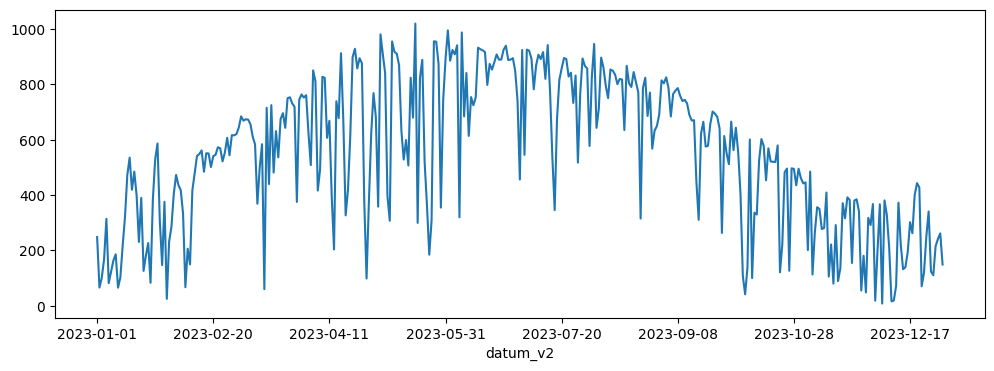

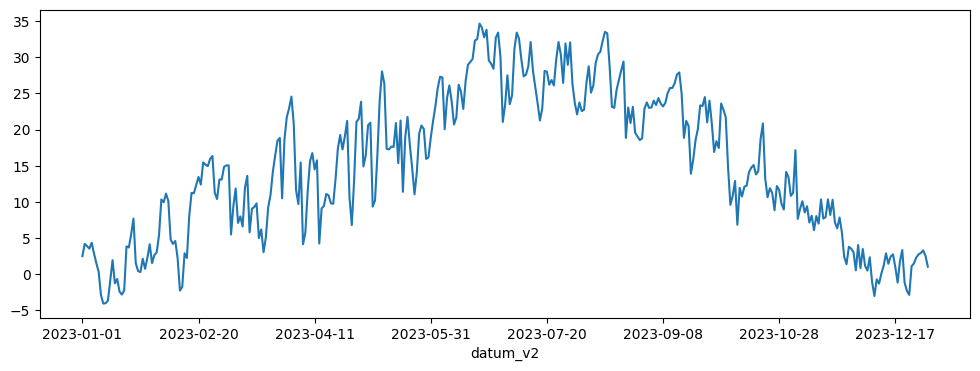

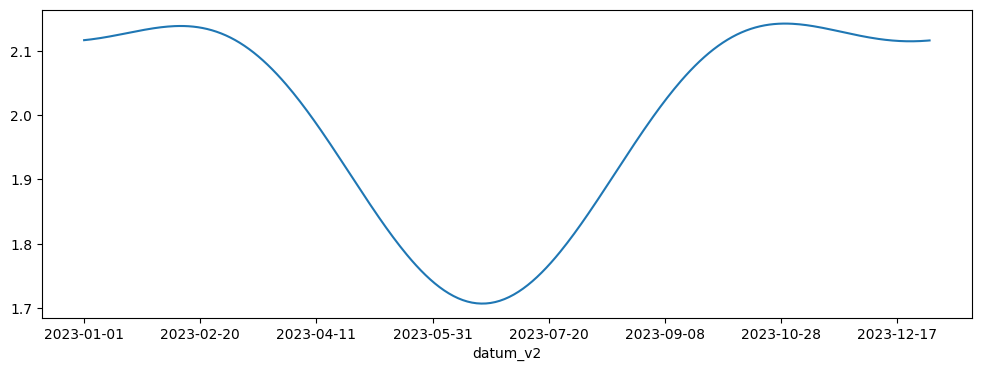

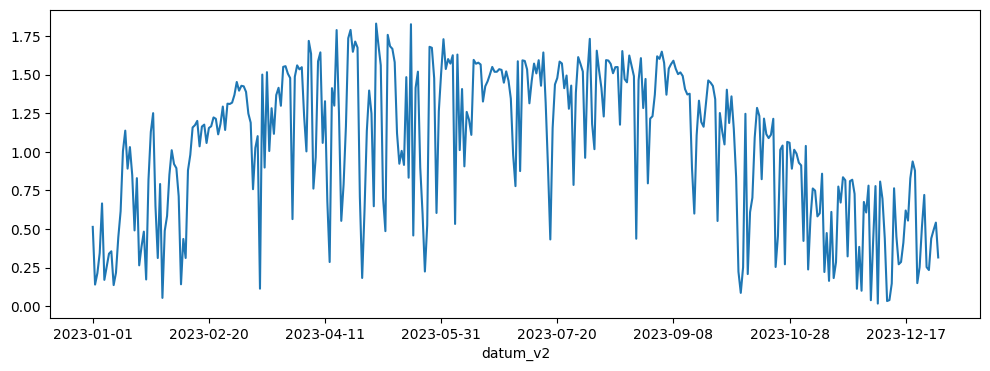

In [91]:
plt.figure(figsize=(12,4))
df_all.groupby("datum_v2")["J"].max().plot()
plt.show()

plt.figure(figsize=(12,4))
df_all.groupby("datum_v2")["T"].max().plot()
plt.show()

plt.figure(figsize=(12,4))
df_all.groupby("datum_v2")["Sr"].max().plot()
plt.show()

plt.figure(figsize=(12,4))
df_all.groupby("datum_v2")["Jd"].max().plot()
plt.show()

# Simlacija notranje Temperature plastenjaka v teku leta

V naši simulaciji bomo izhajali iz kocke, ki ima velikos stranic 1m. Tako je površina vsake stene $1m^{2}$. Neto tok toplote za plastenjak je tako enak:

$$Q\left(t\right)=\left(j_A\left(t\right)S+j_C\left(t\right)S+j_B\left(t\right)\left(f_{vzhod}\left(t\right)S_{vzhod}+f_{jug}\left(t\right)S_{jug}+f_{zahod}\left(t\right)S_{zahod}+f_{strop}\left(t\right)S_{strop}\right)\right) \Delta t.$$

Za posamezne toplotne tokove pa velja:
- $j_A = \lambda \frac{\Delta T}{d}$
- $j_B = \nu I_0 R_d$
- $j_C = \sigma (T_n^4 - T_o^4)$

Prispevek $j_A$ matematično opisuje gostoto toplotnega toka, ki uhaja zaradi toplotnega prevajanja, in je premo sorazmeren s temperaturno razliko ∆T=To-Tn. Kadar je ∆T>0 (okolica ima višjo temperaturo kot notranjost), bo toplotni tok tekel v notranjost plastenjaka. V primeru, ko je ∆T<0, pa toplotni tok teče iz notranjosti plastenjaka v okolico. Z naslednjim členom $j_B$ upoštevamo tudi, da vsa telesa, ki imajo temperaturo višjo od 0 K, sevajo. Kadar se telo nahaja v okolju, pa moramo upoštevati, da tudi okolje seva, kar moramo upoštevati tudi, ko je okolje hladnejše od notranjosti plastenjaka. Kot zadnji člen imamo še gostoto sončnega toka $j_C$.

In [101]:
def simulate_a_year(T,lam,S,h,nu,alb,Sr,key,regulate=False):
    '''
    T - Željena temperatura
    lam - toplotna prevodnost
    S - Površina
    h - višina
    nu - transmisivnost
    alb - albedo
    Sr - skupna površina, ki seva po SB zakonu
    key - ime stolpca, ki vsebuje podatke o svetlobnem toku
    regulate - Če želite regulirati toploto na željeno vrednost
    '''
    Tn=T
    eps=5.67*np.power(10,-8.0)
    jj={}
    jj["A"]=[]
    jj["B"]=[]
    jj["C"]=[]
    jj["D"]=[]
    jj["Tot"]=[]
    jj["Q"]=[]
    jj["Tn"]=[]
    jj["To"]=[]
    for i,ii in df_all.iterrows():
        ja=nu*ii[key]
        if str(ii["Id"])=="nan":
            ja=0
        jb=0.0#alb*eps*(np.power(ii["T"]+273,4.0)-np.power(Tn+273,4.0))*Sr
        jc=lam*(ii["T"]-Tn)*Sr
        jj["A"].append(ja)
        jj["B"].append(jb)
        jj["C"].append(jc)
        jj["Tot"].append(jj["A"][-1]+jj["B"][-1]+jj["C"][-1])
        yy=np.array(jj["A"]) #Pa= ja S
        yy1=np.array(jj["B"])#Pb= jb S 
        yy2=np.array(jj["C"])#Pc= jc S
        jj["Q"].append(np.sum(yy)+np.sum(yy1)+np.sum(yy2)) #Q = (p1 + p2 + p3 + p3)*delta_t
        if regulate==False:
            Tn=Tn+jj["Tot"][-1]*3600/(S*h*1.29*1005)
        else:
            Tn=Tn+jj["Tot"][-1]*3600/(S*h*1.29*1005)
            Q=S*h*1.29*1005*(T-Tn)
            #print(Tn,Q,jj["Tot"],jj["A"],jj["C"])
            Tn=Tn+Q/(S*h*1.29*1005) #1.29 je gostota zraka, ki se segreva
            jj["D"].append(Q)
        jj["Tn"].append(Tn)
        jj["To"].append(ii["T"])
    if len(jj["D"])<1:
        jj["D"]=[0 for i in range(len(jj["A"]))]
    return jj

# Rezultati simulacije

In [93]:
lam=0
a=24.0
b=35.0
h=5.9
S=a*b
Sr=2*a*h+2*b*h+S
V=a*b*h
key=["Jd","Id"]

In [94]:
T=20
k=0

lam=7.5 #W/(mK)
ic=0
alb_p=[0.00001,0.0001,0.001,0.01]

TT=0.97 #Transmisivnost materiala

In [103]:
Regulacija=True

res={}
for T in range(10,28,5):
    res[T]=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=Regulacija)

Subplot 1
10 Done
15 Done
20 Done
25 Done
Subplot 2
10 Done
15 Done
20 Done
25 Done
Subplot 3
10 Done
15 Done
20 Done
25 Done
Subplot 4
10 Done
15 Done
20 Done
25 Done


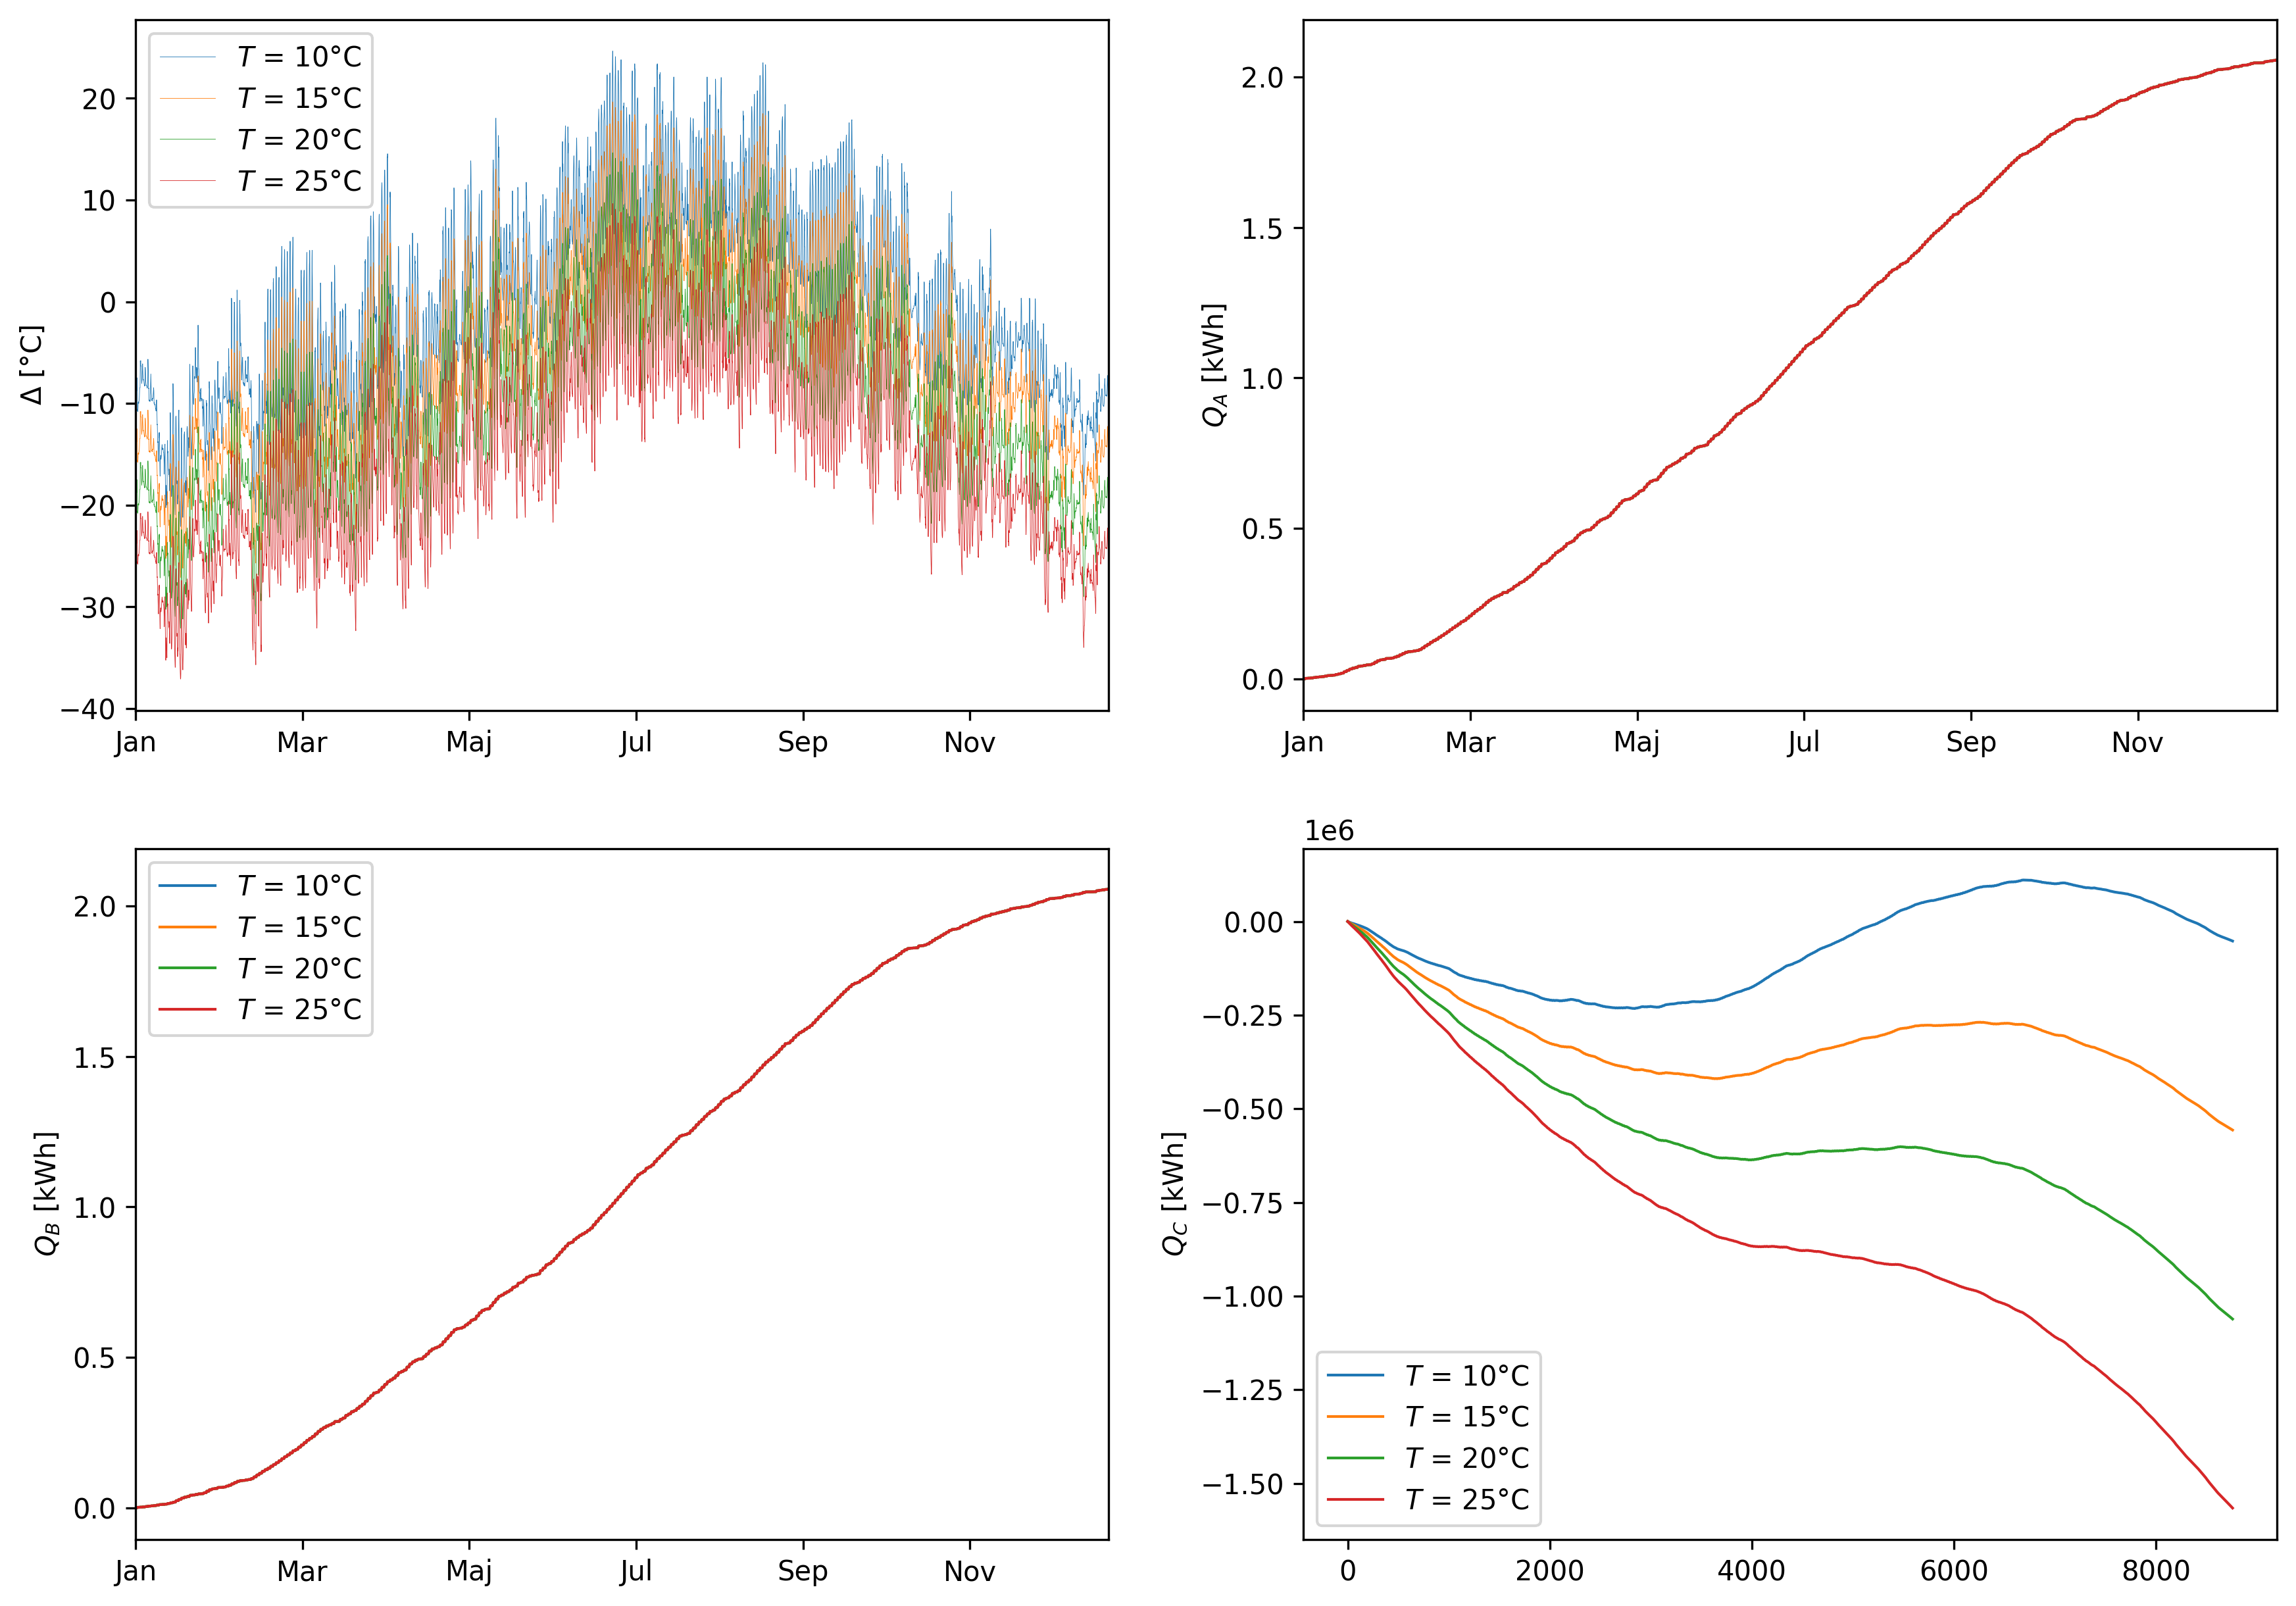

In [104]:
plt.figure(figsize=(14,10),dpi=300)
print("Subplot 1")
plt.subplot(221)

for T in range(10,26,5):
    r=res[T]
    print(T,"Done")
    plt.plot([yy-T for yy in r["To"]],label="$T$ = %.0f°C"%T,lw=0.2,alpha=1)
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,60*24)],["Jan","Mar","Maj","Jul","Sep","Nov","jan"])
plt.xlim(0,350*24)
#plt.ylim(-15,75)
plt.ylabel("$\Delta $ [°C]")
plt.legend()



plt.subplot(222)
print("Subplot 2")
for T in range(10,28,5):
    #r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=Regulacija)
    r=res[T]
    print(T,"Done")
    jj=[np.sum(r["A"][0:kk])/1000 for kk in range(len(r["A"]))]
    plt.plot(jj,label="$T$ = %.0f°C"%T,lw=1,alpha=1)
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,60*24)],["Jan","Mar","Maj","Jul","Sep","Nov","jan"])
plt.xlim(0,350*24)
#plt.ylim(-15,75)
plt.ylabel("$Q_{A}$ [kWh]")


plt.subplot(223)
print("Subplot 3")
for T in range(10,28,5):
    #r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=Regulacija)
    r=res[T]
    print(T,"Done")
    jj=[np.sum(r["B"][0:kk])/1000 for kk in range(len(r["B"]))]
    plt.plot(jj,label="$T$ = %.0f°C"%T,lw=1)
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,60*24)],["Jan","Mar","Maj","Jul","Sep","Nov","jan"])
plt.xlim(0,350*24)
#plt.ylim(-15,75)
plt.ylabel("$Q_{B}$ [kWh]")


plt.subplot(224)
print("Subplot 4")
for T in range(10,28,5):
    #r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=Regulacija)
    r=res[T]
    print(T,"Done")
    jj=[np.sum(r["C"][0:kk])/1000 for kk in range(len(r["C"]))]
    plt.plot(jj,label="$T$ = %.0f°C"%T,lw=1,alpha=1)
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
#plt.xticks([i for i in range(1,364*24,60*24)],["Jan","Mar","Maj","Jul","Sep","Nov","jan"])
#plt.xlim(0,350*24)
#plt.ylim(-15,75)

plt.ylabel("$Q_{C}$ [kWh]")
plt.show()

# Domača naloga

1.1 Kako se spreminja Dolžina dneva glede na zaporeden dan v letu <br>
1.2 Kako se spreminja Lega sonca ob vzhodu glede na zaporeden dan v letu <br>
1.3 Kako se spreminja Lega sonca ob zahodu glede na zaporeden dan v letu <br>
1.4 Kako se spreminja najvija lega sonca ob glede na zaporeden dan v letu <br>

Možnosti za eksperimentiranje:
Primerjaj grafe za lokacijo blizu ekvatorje in za lokacijo blizu pola

In [97]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 126.7/126.7 kB 2.5 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33264 sha256=8180cbc049314e09278edb71ccdac5250c79ea896d4377d9d5c90db76fa09a5d
  Stored in directory: c:\users\rene\appdata\local\pip\cache\wheels\76\27\c2\c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc
